### Importing libraries ###



In [131]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from  sklearn.metrics import accuracy_score

In [132]:
#load the data from csv file to pandas
data=  pd.read_csv('train.csv')


In [133]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
# Let study data dictionary 
# SibSp = # of spouse or siblings in the ship
# parch = # of parent or childeren
# embark = port of emparkation  C-Cherbourg Q- Queenstown S- douthampton






In [135]:
data.shape


(891, 12)

In [136]:

# Servived colum is the targer variale all other are features

In [137]:
#getting some information about the data
data.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [138]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [139]:
data.info() #here you can check non null lavues and check if the columns have any null value all in once 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [140]:
#check the number of missing values in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling the missing values ###

In [141]:
# most of the values from cabin columns are missing so we will drop the column
data = data.drop(columns ='Cabin', axis =1)

In [142]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [143]:
 data['Age'].mean()
    
    
    

29.69911764705882

In [144]:
data['Age'].value_counts().unique()

array([30, 27, 26, 25, 24, 23, 22, 20, 18, 17, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1])

In [145]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [146]:
data['Embarked'].mode()


0    S
dtype: object

In [147]:
data['Embarked'].fillna(data['Embarked'].mode() ,inplace = True)

In [200]:
data['Embarked'].fillna('S',inplace = True)

In [201]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [202]:
data['Embarked'].value_counts()




0.0    644
1.0    168
2.0     77
S        2
Name: Embarked, dtype: int64

In [203]:
#getting some statatical measures about the data
data.describe() # not very useful on categorical columns

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [204]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [205]:
# DATA VISUALIZATION
sns.set() # to make a theme for plots



In [206]:
# making a plot for servived column



/usr/share/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

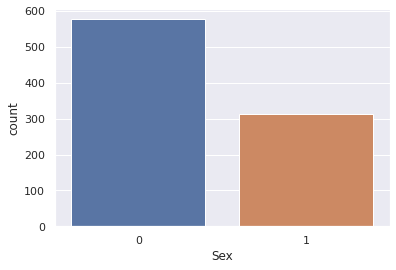

In [207]:
sns.countplot('Sex', data = data)

/usr/share/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

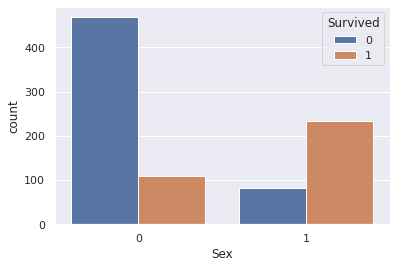

In [208]:
# number of survivers gender wise
sns.countplot('Sex', hue = 'Survived', data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

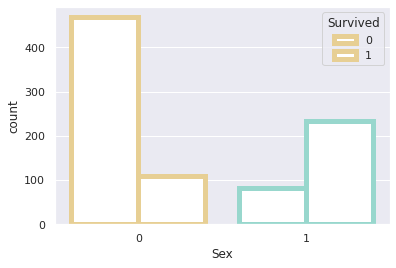

In [209]:
sns.countplot(x='Sex', hue = 'Survived', data=data, color="green", facecolor=(1,1,1,1
                                                                             ), linewidth=5, edgecolor=sns.color_palette("BrBG",2))

In [210]:
sns.countplot('Pclass
              ', hue = 'Survived', data=data)

SyntaxError: EOL while scanning string literal (1095689904.py, line 1)

/usr/share/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

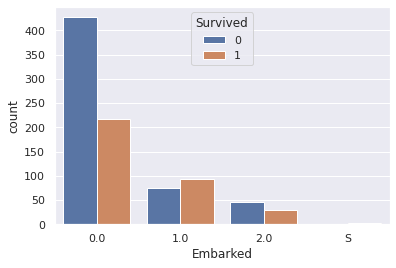

In [211]:
sns.countplot('Embarked', hue = 'Survived', data=data)

In [212]:
data = data.drop(columns = 'Name', axis =1)

KeyError: "['Name'] not found in axis"

In [213]:
data.head()




,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,0,35.0,0,0,373450,8.0500,0.0


In [214]:
#Encloding categorical columns

data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [215]:
 data.replace({'Sex':{'male':0, 'female':1}, 'Emabarked' :{'S':0, 'C':1 , 'Q':2}}, inplace = True)

In [216]:
data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace= True)

In [217]:
data['Embarked'].value_counts()

0.0    646
1.0    168
2.0     77
Name: Embarked, dtype: int64

In [218]:
data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [219]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [220]:
# seperating  x and y variables
X = data.drop(columns  = ['PassengerId','Ticket','Survived'], axis =1)
Y= data['Survived']

In [250]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=4) 

#### Model Training ###

##### logestic regression model. used for binary classifiacation
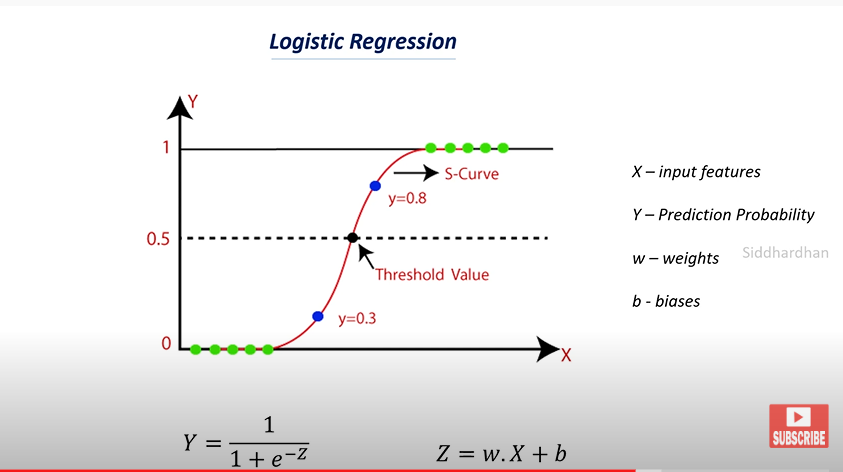
##### 

Y will contain probability of getting 0 or 1. whichever wll have more probability will get assigned


In [251]:



model = LogisticRegression() # this will load one instance of logistic regression to this variable called model

In [252]:
#training the logistic regression model with training data
model.fit(x_train,y_train)

/usr/share/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

#### Model Evaluation


##### Acuracy Score comaparing how many correct prediction the model is making

In [253]:
#acuracy on training data
x_train_prediction = model.predict(x_train)









In [254]:
print(x_train_prediction)

[0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 1 1 0 1 

In [255]:
taining_data_accuracy= accuracy_score(y_train,x_train_prediction)
print("training data accuracy" , taining_data_accuracy)

training data accuracy 0.7921348314606742


In [256]:
#accuracy on test data
x_test_prediction= model.predict(x_test)

In [257]:
print(x_test_prediction)

[0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0]


In [258]:
#accuracy on test data
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print("test data accuracy", test_data_accuracy)

test data accuracy 0.8212290502793296
